We learn how to process csv files using command lines, import to the database, now we willlearn how to manipulate the data in Python

In [3]:
import numpy as np
import pandas as pd
import psycopg2 as pg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

total number of unemployed 12843
total number with more than  3477
total number with more than 1 application that is ltu 2454
shape (12843, 3)
shape (16, 2)
total number of unemployed 12843


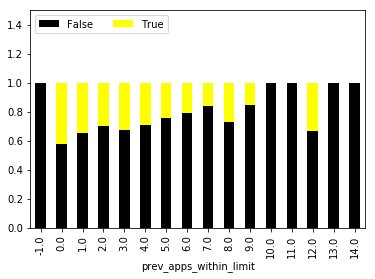

In [23]:
from pandas import Series, DataFrame
#dataltu=data[data["ltu"]==True]
#plotFrame=dataltu[["application_id","year","intended_prof"]]
#print "shape",plotFrame.shape
#plotFrame=DataFrame(plotFrame.groupby(["year","intended_prof"]).count())
##print plotFrame.head(100)
#plotFrame=plotFrame.unstack(level=1)
##plotFrame.head(100)
#plotFrame=plotFrame.xs("application_id",axis=1,drop_level=True)
#print "shape",plotFrame.shape
#plotFrame=plotFrame[columnsOrder]
##plotFrame.sort_values(by=2016,ascending=False,axis=1,inplace=True)
#plotFrame.loc[:, 'total'] = plotFrame.sum(axis=1)
##cancel_reasons.div(cancel_reasons.loc[:, 'total'], axis=0)
#ax=plotFrame.div(plotFrame.loc[:,'total'],axis=0).drop("total",axis=1).plot(kind="bar",stacked=True,colormap="gnuplot",ylim=[0,1.5])
#patches, labels = ax.get_legend_handles_labels()
#ax.legend(patches, labels, loc='upper left',ncol=3)


data=pd.read_csv('/mnt/data/shared/workingData/testPrev.csv')
plotFrame=data[["application_id","prev_apps_within_limit","ltu"]]
print "total number of unemployed",data.shape[0]
print "total number with more than ",plotFrame[plotFrame["prev_apps_within_limit"]>1].shape[0]
print "total number with more than 1 application that is ltu",plotFrame[(plotFrame["prev_apps_within_limit"]>1)&(plotFrame["ltu"]==False)].shape[0]
print "shape",plotFrame.shape
plotFrame=DataFrame(plotFrame.groupby(["prev_apps_within_limit","ltu"]).count())
#print plotFrame.head(100)
plotFrame=plotFrame.unstack(level=1)
#plotFrame.head(100)
plotFrame=plotFrame.xs("application_id",axis=1,drop_level=True)
print "shape",plotFrame.shape
plotFrame.sort_values(by=10,ascending=False,axis=1,inplace=True)
plotFrame.loc[:, 'total'] = plotFrame.sum(axis=1)
#cancel_reasons.div(cancel_reasons.loc[:, 'total'], axis=0)
ax=plotFrame.div(plotFrame.loc[:,'total'],axis=0).drop("total",axis=1).plot(kind="bar",stacked=True,colormap="gnuplot",ylim=[0,1.5])
#ax=plotFrame.drop("total",axis=1).plot(kind="bar",stacked=True,colormap="gnuplot",ylim=[0,7000])
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper left',ncol=3)
print "total number of unemployed",data.shape[0]


#data.head()
#data=data[['ltu','application_id','prev_apps_within_limit']]
#plotData=DataFrame(data.groupby(["ltu","prev_apps_within_limit"]).count())
#plotData=plotData.unstack(level=1)
#plotData=plotData.xs("application_id",axis=1,drop_level=True)
#plotData.head(100)
#plotData.plot(kind='bar',stacked='True')

#data=data[data['ltu']==True]
#data.head()
#data.groupby("ltu").plot(kind='bar',stacked=True)

conn.cursor will return a cursor object, you can use this cursor to perform queries

In [3]:
def generate_df(table_list):
    df_dict = {}
    for table in table_list:
        df_dict[table] = pd.read_csv('/mnt/data/shared/workingData/csv-files/'+table)
    return df_dict

In [4]:
#test=pd.read_csv('/mnt/data/shared/workingData/csv-files/unl-Pedido-fixed.csv')
#test.head
df_dict = generate_df(['unl-Pedido-fixed.csv','unl-sie-31.csv','unl-sie-43.csv','unl-sie-38-fixed.csv','unl-sie-36-falta id.csv','unl-sie-37.csv'])

/opt/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (1,12,13,24,25,27,28,38,39,52) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:

df_dict = generate_df(['unl-Pedido-fixed.csv','unl-sie-31.csv','unl-sie-43.csv','unl-sie-38-fixed.csv','unl-sie-36-falta id.csv','unl-sie-37.csv'])
apps_df = df_dict['unl-Pedido-fixed.csv']
cancel_df = df_dict['unl-sie-31.csv']
cat_changes_df = df_dict['unl-sie-43.csv']
convocation_df = df_dict['unl-sie-38-fixed.csv']
interventions_df = df_dict['unl-sie-36-falta id.csv']
interviews_df = df_dict['unl-sie-37.csv']
apps_df.rename(columns={"Ute-Id":"ute_id"},inplace=True)
apps_df.rename(columns={"Candidatura-Origem":"Cause"},inplace=True)
apps_df.rename(columns={"AnoMes":"Date"},inplace=True)
apps_df=apps_df[pd.notnull(apps_df['Cause'])]
apps_df=apps_df[pd.notnull(apps_df['Date'])]
#Here it is shown how to convert a part of a string to an integer. We will not use this
#apps_df["Date"]=(apps_df["Date"].astype(str).str[:4].astype(int)
apps_df=apps_df[["ute_id","Date","Cause"]]
apps_df["type"]="application"

cancel_df.rename(columns={"ID":"ute_id"},inplace=True)
cancel_df.rename(columns={"DMotivo Anulação":"Cause"},inplace=True)
cancel_df.rename(columns={'AnoMes':"Date"},inplace=True)
cancel_df=cancel_df[pd.notnull(cancel_df['Date'])]
cancel_df=cancel_df[["ute_id","Date","Cause"]]
cancel_df["type"]="cancellation"

cat_changes_df.rename(columns={"Ute-Id":"ute_id"},inplace=True)
cat_changes_df.rename(columns={"DCategoria":"Cause"},inplace=True)
cat_changes_df.rename(columns={'AnoMes':"Date"},inplace=True)
cat_changes_df=cat_changes_df[pd.notnull(cat_changes_df['Date'])]
cat_changes_df=cat_changes_df[["ute_id","Date","Cause"]]
cat_changes_df["type"]="statusChange"

convocation_df.rename(columns={"Ute-Id":"ute_id"},inplace=True)
convocation_df.rename(columns={"DResultado Convocatória":"Result"},inplace=True)
convocation_df.rename(columns={"DTipo Convocatória":"TypeOfIntervention"},inplace=True)
convocation_df.rename(columns={'AnoMes':"Date"},inplace=True)
convocation_df=convocation_df[pd.notnull(convocation_df['Date'])]
convocation_df=convocation_df[["ute_id","Date","Result","TypeOfIntervention"]]
convocation_df["type"]="convocation"

interventions_df.rename(columns={"Ute-Id":"ute_id"},inplace=True)
interventions_df.rename(columns={"Intervenção Codigo D":"Cause"},inplace=True)
interventions_df.rename(columns={'AnoMes':"Date"},inplace=True)
#How to remove all lines that has NaN in one of the columns
interventions_df=interventions_df[pd.notnull(interventions_df['Date'])]
interventions_df=interventions_df[["ute_id","Date","Cause"]]
interventions_df["type"]="intervention"

interviews_df.rename(columns={"Ute-Id":"ute_id"},inplace=True)
interviews_df.rename(columns={"DResultado Apresentação":"Cause"},inplace=True)
interviews_df.rename(columns={'AnoMes':"Date"},inplace=True)
interviews_df=interviews_df[pd.notnull(interviews_df['Date'])]
interviews_df=interviews_df[["ute_id","Date","Cause"]]
interviews_df["type"]="interviews"
interviews_df.head()



,ute_id,Date,Cause,type
0,1060922,200701,RECUSA DE ENTIDADE EMPREGADORA - DESAJUSTAMENT...,interviews
1,1062047,200701,ADMITIDO / COLOCADO,interviews
2,1062047,200701,RECUSA ENTIDADE EMPREGADORA- OUTROSMOTIVOS,interviews
3,1080395,200701,ADMITIDO / COLOCADO,interviews
4,1133828,200701,RECUSA DE ENTIDADE EMPREGADORA - POSTO JÁ PREE...,interviews


In [6]:
frames=[apps_df,cancel_df,cat_changes_df,convocation_df,interventions_df,interviews_df]
total=pd.concat(frames)
#How to sort data. This is now sorted first by the id and then by the type of application
total=total.sort_values(["ute_id","Date"])


In [3]:
def print_histograms (df):
    for x in df.columns:
        plt.figure()
        #print type(getattr)
        getattr(df,x).value_counts(dropna=False).plot(kind='bar', title=x)

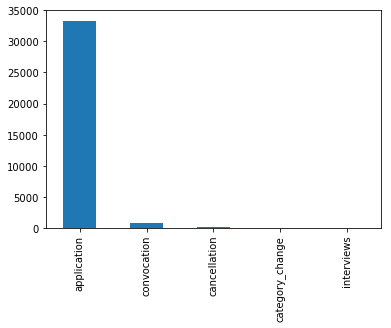

In [42]:
import csv
data=pd.read_csv('/mnt/data/shared/workingData/iefp_events_data.csv')
data.rename(columns={"Ute-Id":"ute_id"},inplace=True)
#find all the rows that has a data later than 201012.
remove_data=data[data["Date"]<=201012]
#find all the unique ids in the data
remove_id=remove_data.ute_id.unique()
#make a true false series that shows if the id is in the list or not 
to_remove=data['ute_id'].isin(remove_id)
#take the dataframe and remove the data that has the unvanted id
selected_data=data[~data['ute_id'].isin(remove_id)]
selected_data.head()
#group by ute_id and find the first in each group. 
#this is now a series
first_user_event=selected_data.groupby("ute_id").first()
first_user_event.head()
first_user_event["event_type"].value_counts().plot(kind='bar')
#convert the series to a data frame
#frame=first_user_event.to_frame()
#print frame.head()